## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model    


In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.5, 0.1]
nesterov = [True, False]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mt in MOMENTUM:
    for nv in nesterov:
        #print(type(nv), nv)
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f nesterov = %s" % (mt, nv))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE[0], nesterov=True, momentum=mt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-mt:%s-nv:%s" % (str(mt), str(nv))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000 nesterov = True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 16ms/ste

196/196 [==============================] - 3s 16ms/step - loss: 0.8737 - accuracy: 0.6967 - val_loss: 1.3610 - val_accuracy: 0.5445
Experiment with MOMENTUM = 0.950000 nesterov = False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 

196/196 [==============================] - 3s 15ms/step - loss: 0.8612 - accuracy: 0.6978 - val_loss: 1.4711 - val_accuracy: 0.5176
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8509 - accuracy: 0.7026 - val_loss: 1.4048 - val_accuracy: 0.5329
Experiment with MOMENTUM = 0.500000 nesterov = True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.5672 - accuracy: 0.4506 - val_loss: 1.5938 - val_accuracy: 0.4410
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5631 - accuracy: 0.4528 - val_loss: 1.5814 - val_accuracy: 0.4443
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5590 - accuracy: 0.4536 - val_loss: 1.5803 - val_accuracy: 0.4459
Experiment with MOMENTUM = 0.500000 nesterov = False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

196/196 [==============================] - 3s 16ms/step - loss: 1.5668 - accuracy: 0.4542 - val_loss: 1.5856 - val_accuracy: 0.4438
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5628 - accuracy: 0.4554 - val_loss: 1.5764 - val_accuracy: 0.4516
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5589 - accuracy: 0.4563 - val_loss: 1.5768 - val_accuracy: 0.4464
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5539 - accuracy: 0.4594 - val_loss: 1.5679 - val_accuracy: 0.4491
Experiment with MOMENTUM = 0.100000 nesterov = True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________

196/196 [==============================] - 3s 16ms/step - loss: 1.6729 - accuracy: 0.4172 - val_loss: 1.6778 - val_accuracy: 0.4160
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6693 - accuracy: 0.4187 - val_loss: 1.6768 - val_accuracy: 0.4173
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6658 - accuracy: 0.4208 - val_loss: 1.6718 - val_accuracy: 0.4151
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6622 - accuracy: 0.4208 - val_loss: 1.6719 - val_accuracy: 0.4144
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6589 - accuracy: 0.4231 - val_loss: 1.6653 - val_accuracy: 0.4195
Experiment with MOMENTUM = 0.100000 nesterov = False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________

196/196 [==============================] - 3s 16ms/step - loss: 1.6616 - accuracy: 0.4212 - val_loss: 1.6644 - val_accuracy: 0.4174
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6582 - accuracy: 0.4218 - val_loss: 1.6621 - val_accuracy: 0.4210
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6546 - accuracy: 0.4234 - val_loss: 1.6639 - val_accuracy: 0.4178
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6511 - accuracy: 0.4250 - val_loss: 1.6620 - val_accuracy: 0.4134
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6479 - accuracy: 0.4260 - val_loss: 1.6525 - val_accuracy: 0.4225
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6448 - accuracy: 0.4279 - val_loss: 1.6485 - val_accuracy: 0.4237


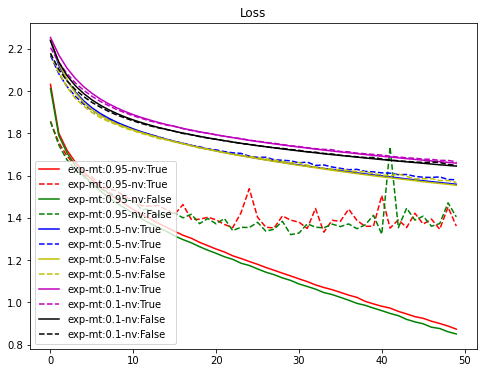

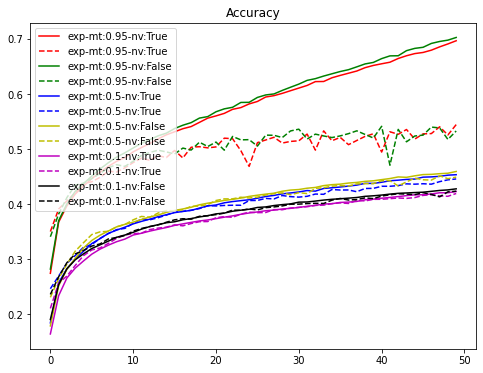

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()